In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [20]:
data = pd.read_csv('Default.csv')

In [21]:
# Convert categorical variable 'default' and 'student' to numeric
data['default'] = data['default'].map({'Yes':1, 'No':0})
data['student'] = data['student'].map({'Yes':1, 'No':0})

# Define predictors and target
X = data[['balance', 'income', 'student']]
y = data['default']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ### (b) Fit Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

log_train_preds = log_model.predict(X_train_scaled)
log_test_preds = log_model.predict(X_test_scaled)

log_train_acc = accuracy_score(y_train, log_train_preds)
log_test_acc = accuracy_score(y_test, log_test_preds)

print(f"Logistic Regression Training Accuracy: {log_train_acc}")
print(f"Logistic Regression Test Accuracy: {log_test_acc}")


Logistic Regression Training Accuracy: 0.9737142857142858
Logistic Regression Test Accuracy: 0.9736666666666667


# ### (c) Fit Neural Network with one hidden layer (10 units) and dropout regularization

In [23]:
from sklearn.neural_network import MLPClassifier

# Build and train neural network using scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.0001,
                    learning_rate_init=0.001, max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate performance
mlp_train_preds = mlp.predict(X_train_scaled)
mlp_test_preds = mlp.predict(X_test_scaled)

mlp_train_acc = accuracy_score(y_train, mlp_train_preds)
mlp_test_acc = accuracy_score(y_test, mlp_test_preds)

print(f"MLP Neural Network Training Accuracy: {mlp_train_acc}")
print(f"MLP Neural Network Test Accuracy: {mlp_test_acc}")

MLP Neural Network Training Accuracy: 0.9728571428571429
MLP Neural Network Test Accuracy: 0.9726666666666667


# ### (d) Compare Results

In [24]:
print("\nComparison:")
print(f"Logistic Regression Test Accuracy: {log_test_acc}")
print(f"MLP Neural Network Test Accuracy: {mlp_test_acc}")


Comparison:
Logistic Regression Test Accuracy: 0.9736666666666667
MLP Neural Network Test Accuracy: 0.9726666666666667


# ### (e) Plot Training History

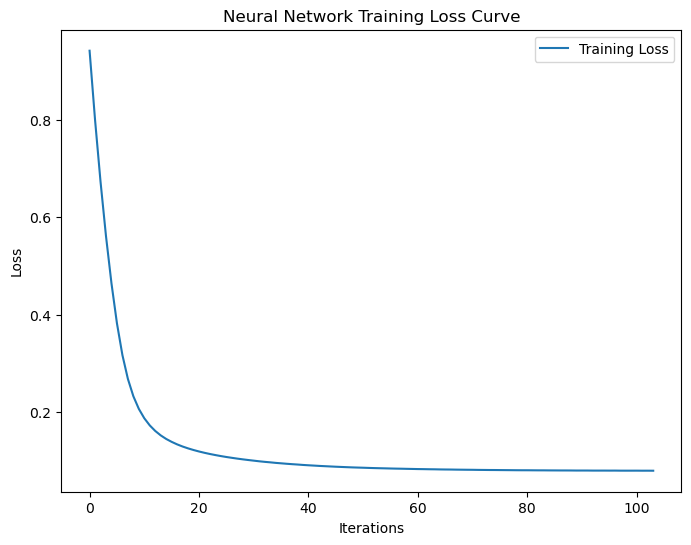

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Neural Network Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()